# Forecasts and Predictions Project

# Project Description
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.
You should:
Learn to predict the probability of churn (for the upcoming month) for each customer
Draw up typical user portraits: select the most outstanding groups and describe their main features
Analyze the factors that impact churn most
Draw basic conclusions and develop recommendations on how to improve customer service:
Identify target groups
Suggest measures to cut churn
Describe any other patterns you see with respect to interaction with customers

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

In [5]:
#!pip install seaborn --upgrade

## Step 1. Download the data

In [9]:
data = pd.read_csv('gym_churn_us.csv')

In [10]:
data .head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [12]:
data.columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period_months', 
               'group_sessions', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime_months',
               'avg_visits_per_week_total', 'avg_visits_per_week_last_month', 'churn']

In [13]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period_months,group_sessions,age,avg_additional_charges_total,month_to_end_contract,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Step 2. Exploratory data analysis (EDA)

#### Missing values 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4000 non-null   int64  
 1   near_location                   4000 non-null   int64  
 2   partner                         4000 non-null   int64  
 3   promo_friends                   4000 non-null   int64  
 4   phone                           4000 non-null   int64  
 5   contract_period_months          4000 non-null   int64  
 6   group_sessions                  4000 non-null   int64  
 7   age                             4000 non-null   int64  
 8   avg_additional_charges_total    4000 non-null   float64
 9   month_to_end_contract           4000 non-null   float64
 10  lifetime_months                 4000 non-null   int64  
 11  avg_visits_per_week_total       4000 non-null   float64
 12  avg_visits_per_week_last_month  40

In [15]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period_months,group_sessions,age,avg_additional_charges_total,month_to_end_contract,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


There are no missing values.

From the mean values and standard deviation table it can be seen the following:
1. equal distribuation between men and wemen
2. most customers live near the gym location
3. equal distribuation of customers that are employees of a partner company and are not employees
4. almost half of the customers were  recommended with a promotional code from a friend
5. most of the customers user provided their phone number 
6. more customers do not attend group sessions
7. customers have contract for almost 5 months in avarege
8. the average age of customers is 29 years old
9. customers spent on other gym services on average 147$
10. most of the customers have 4 months remaining until their contract expires
11. most of the customers visitst more than once a week
12. the churn rate for the month in question is 0.26 in average

#### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed 

In [16]:
churn_data= data.groupby('churn').mean().reset_index()
churn_data

,churn,gender,near_location,partner,promo_friends,phone,contract_period_months,group_sessions,age,avg_additional_charges_total,month_to_end_contract,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


It can be seen that:
By gender, the churn rate was equal between male and female customers 
Most customers who left (churn) do not live near a gym location compared to those who stayed, 
customers who left are not employees of a partner company and were not given a promotional code by a friend. They had sorter contract period than those who stayed ( 1.5 month long contract compared to 6 month), they less attend group sessions, were younger than those who stayed (27 years old compared to 30), spent less money on additional gym services, had less months remaining on the end of the contract (1.6 monthes compare to 5), had been a member for less months (1 month compared to 5) and visit less times a week (once compared to twice a week).


#### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.


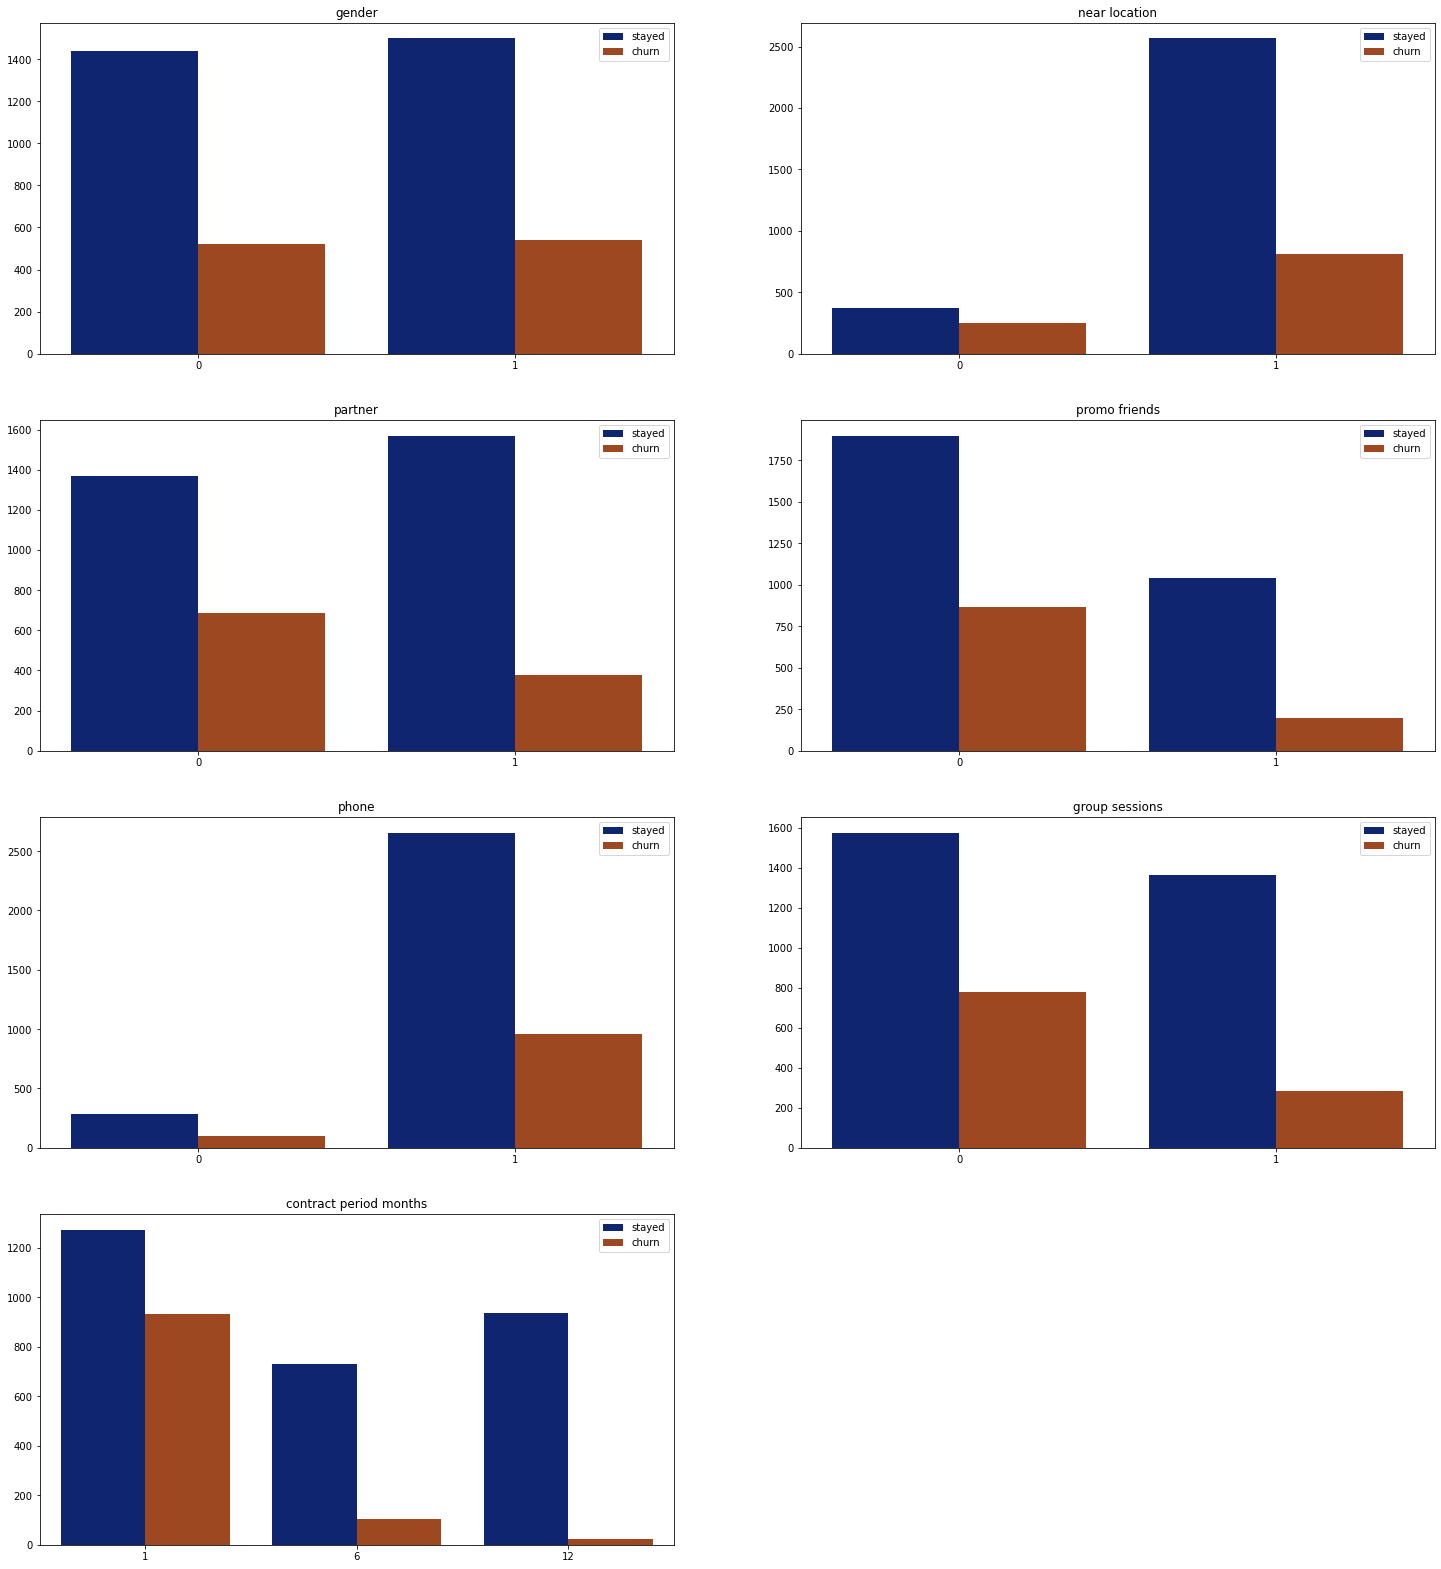

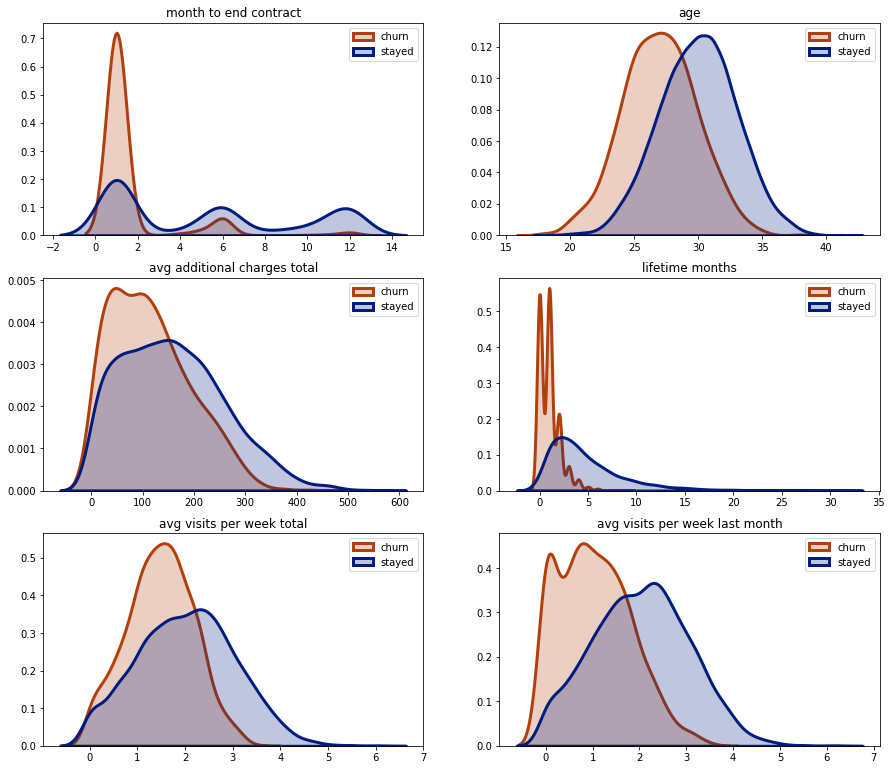

In [17]:
sns.set_palette('dark')
plt.figure(figsize=(25,28))
gs = GridSpec(4, 2)

categorial = ['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_sessions',
           'contract_period_months']
numeric = ['month_to_end_contract', 'age', 'avg_additional_charges_total',
           'lifetime_months', 'avg_visits_per_week_total', 'avg_visits_per_week_last_month']

 
for i, var in enumerate(categorial):
    plt.subplot(gs[i//2, i%2], title=var.replace('_',' '))
    g=sns.countplot(data=data, x=var, hue="churn")
    plt.xlabel('')
    plt.ylabel('')
    #plt.gca().get_legend().remove()
    #legend = data['cluster'].unique()
    plt.legend(loc='upper right', labels=['stayed','churn'])


plt.show()

sns.set_palette('dark')
plt.figure(figsize=(15,18))
gs = GridSpec(4, 2)

for i, var in enumerate(numeric):
    plt.subplot(gs[i//2, i%2], title=var.replace('_',' '))
    sns.kdeplot(data=data, x=var, hue="churn", fill=True, common_norm=False, palette="dark", shade=True,
    linewidth=3)
    plt.xlabel('')
    plt.ylabel('')
    #plt.gca().get_legend().remove()
    #legend = data['cluster'].unique()
    #plt.legend(legend, shadow=True, fancybox=True, loc='best')
    plt.legend(loc='upper right', labels=['churn','stayed'])
plt.show()


From The graphs above:  

For gender - very similar numbers of males and females churned and did not churn

For near_location - most customrs who stayed live near a gym location there is a large amount customers who did not churn and who live. in genral, there are less customers who don't leave near a gym in both groups.

For partner - Customers who are employee of a partner company, churn a bit less and stayed a bit more than customers who are not employee of a company that the gym partners

For promo_friends- Promotion from a friend do not have any effect on customers to stay. most customers who stayed didn't have a promrtion from a friend and also most customers who churnd.

For phone- most customers who stayd, provided their phone number. more customers who churn also rovided their phone number but much less than those who stayed

For months_to_end_contract, most customers who churn had 1 month remaining on the contract. 

For contract_period time-  most customers who churnd had shorer contruct of 1 month and didn't do a long period contract. 

For group_sessions- in both groups more customers did'nt participated in group sessions. Customers who churned were less likely to participate in group sessions

For age - customers who churnd are younger compared to those who stayed.

For avg_additional_charges_total- the distribution is very simialr for coth groups

For lifetime_months- customers who churn have been members for less time (less than 5 months).

For avg_visits_per_week_total- customers who stayed visited the gym more frequently  per week over the customer's lifetimeon than customers who churned. 

For avg_visits_per_week_last_month - customers who stayed visited the gym more frequently  per week last month than customers who churned. Most customers who churn visit in the last month less than twice a week.  



#### Build a correlation matrix and display it.

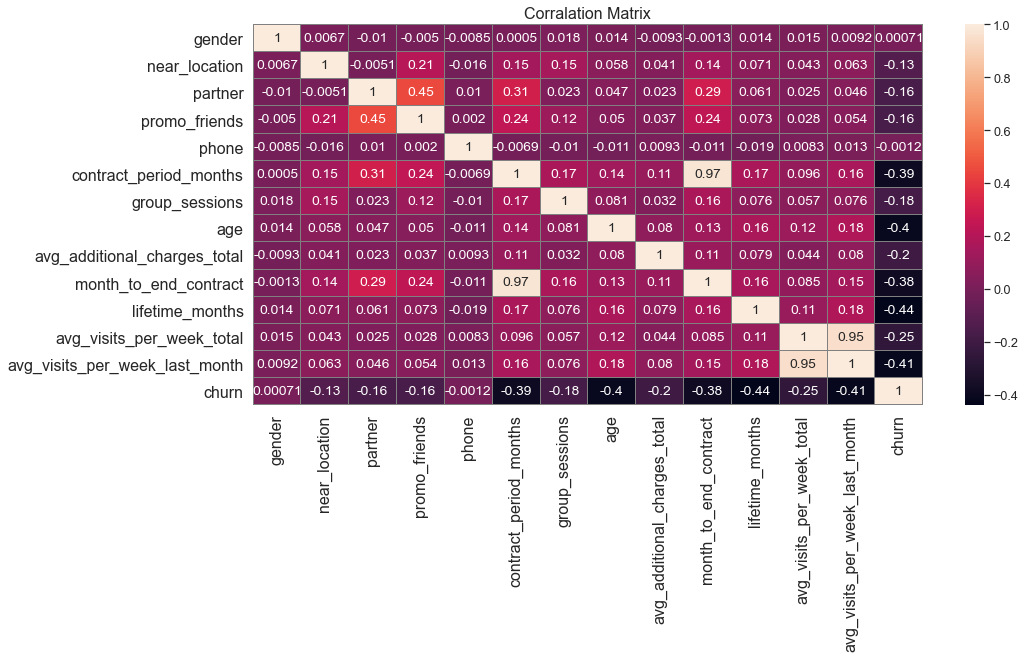

In [18]:
cor_matrix = data.corr()

plt.figure(figsize=(15,7))
sns.set(font_scale=1.15)
heat = sns.heatmap(cor_matrix, annot=True, linewidths=0.01,linecolor='grey')
plt.tick_params(labelsize=16)
plt.title('Corralation Matrix',fontdict={'fontsize':16})
plt.show()

From the correlation matrix it can be seen that there is a strong corralation between month to end of contract and contract period, also between avg visit per week last month and avg visit per week total. 
It makes sense that these are stronly related since the monthly calculation is a portion of the total calculation. 

## Step 3. Build a model to predict user churn

#### Build a binary classification model for customers where the target feature is the user's leaving next month.

In [19]:
# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('churn', axis = 1)
y = data['churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y )

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler() 

# train the scaler and transform the matrix for the train set
X_train_st = scaler.fit_transform(X_train) 

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

In [20]:
# declare the list of two methods: logistic regression, random forest
models = [LogisticRegression(random_state=0, solver='lbfgs'), RandomForestClassifier(random_state=0,  n_estimators=100)]

# function that takes the model and data as input and outputs metrics
# evaluate accuracy, precision, and recall for both models using the validation
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  
    print('Model: ', model)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score (y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score (y_test, y_pred)))
   
# outputs metrics for each model
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train, X_test=X_test_st, y_test = y_test)

LogisticRegression(random_state=0)
Model:  LogisticRegression(random_state=0)
Accuracy: 0.94
Precision: 0.90
Recall: 0.85
RandomForestClassifier(random_state=0)
Model:  RandomForestClassifier(random_state=0)
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


Comparing the two models: Logistic Regression and Random Forest Classifier, it seems that althogh both models had good and very similar results,  Logistic regression model gave better results in all ,etrics: 

Accuracy is the share of accurate predictions among all predictions where the close to 1, the better. For this metric, Logistic Regression has a better score.

Precision tells us what share of predictions in class 1 are true by looking at the share of correct answers only in the target class, where the close to 1 the better. For this metric, Logistic Regression has a better score.

Recall demonstrates the number of real class 1 objects you were able to discover with your model, where the closer to 1, the better. For this metric, Logistic Regression has a better score.


## Step 4. Create user clusters

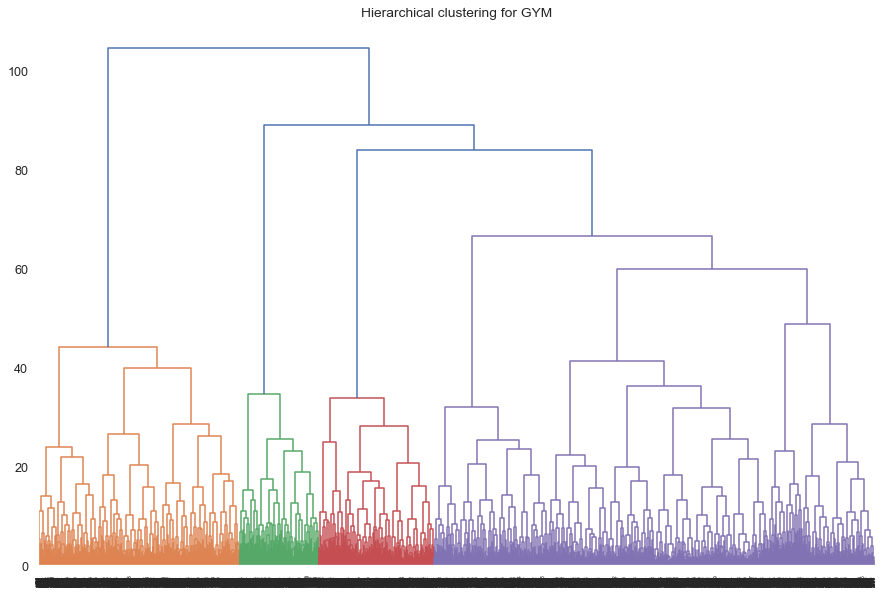

In [21]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# Use the linkage() function to build a matrix of distances based on the standardized feature matrix
linked = linkage(x_sc, method = 'ward') 

# plot a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

The dendrogram above estimates the optimal number of clusters. It can be seen that the suggested optimal number of clusters is 4, corresponds to the four different colors on the plot.

In [22]:
# Train the clustering model with the K-means algorithm and predict customer clusters

# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5, random_state=0)

# predict the clusters for observations 
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
data['cluster'] = labels

# get the statistics of the mean feature values per cluster
data_cluster = data.groupby(['cluster']).mean().reset_index()
data_cluster

,cluster,gender,near_location,partner,promo_friends,phone,contract_period_months,group_sessions,age,avg_additional_charges_total,month_to_end_contract,lifetime_months,avg_visits_per_week_total,avg_visits_per_week_last_month,churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


From the table above, clusters 0 & 4 have the lowest churn value, close to 0, which means most users in these clusters did'nt churn.
It can be seen that these clusters spent the highst total amount of money  on other gym services and have the biggest liftime 
In cluster 4, the near loacation value is 0, which represent customers who don't live or work in the neighborhood where the gym is located
In cluster 1, the phone is 0, and therfore represnt users who didn't provided their phone number.
These featurs might be connected to users who will churn.

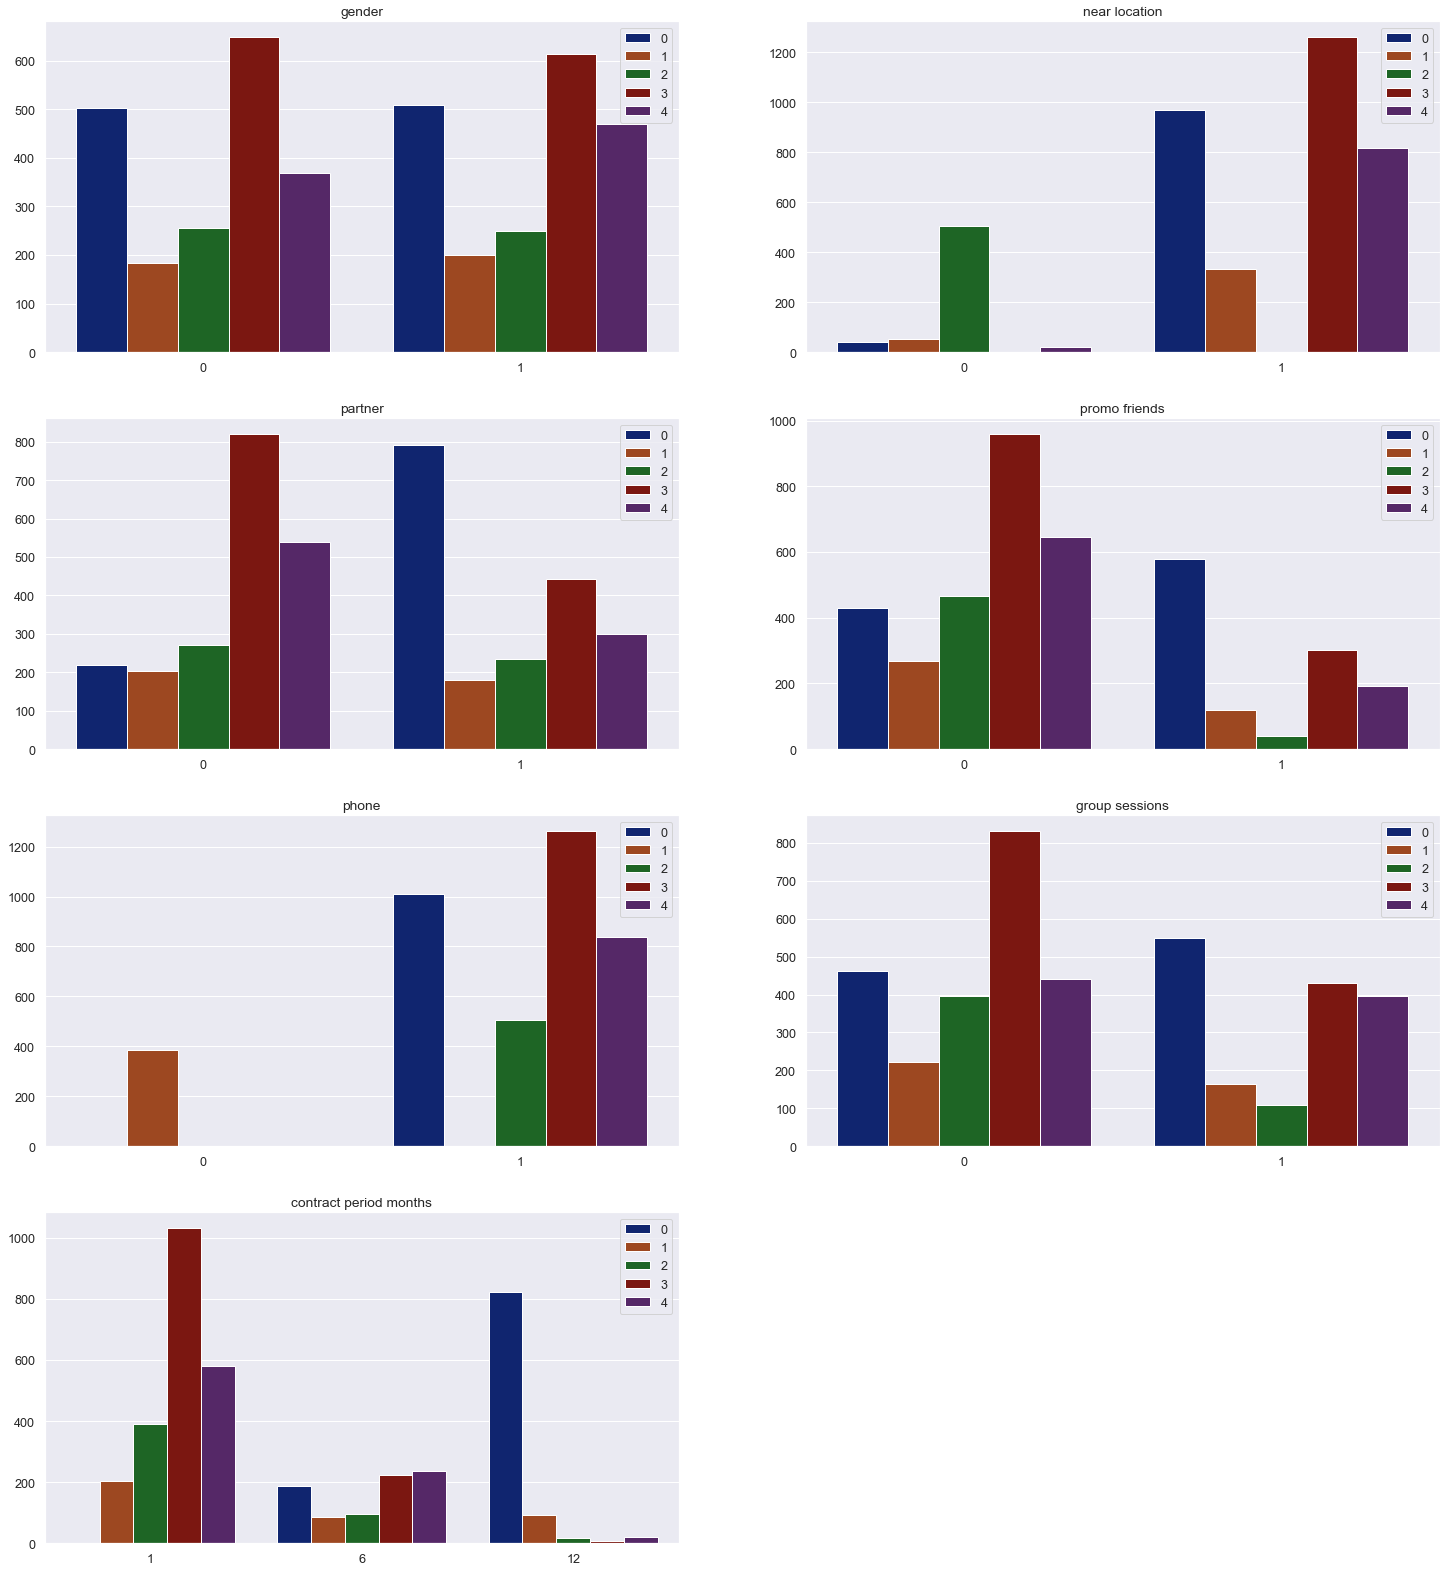

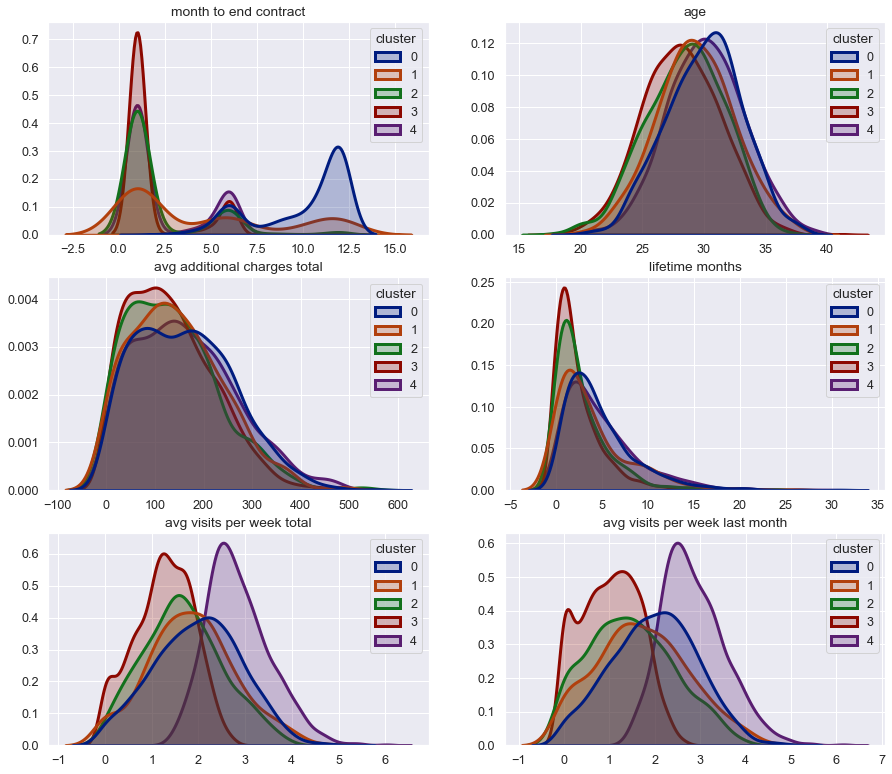

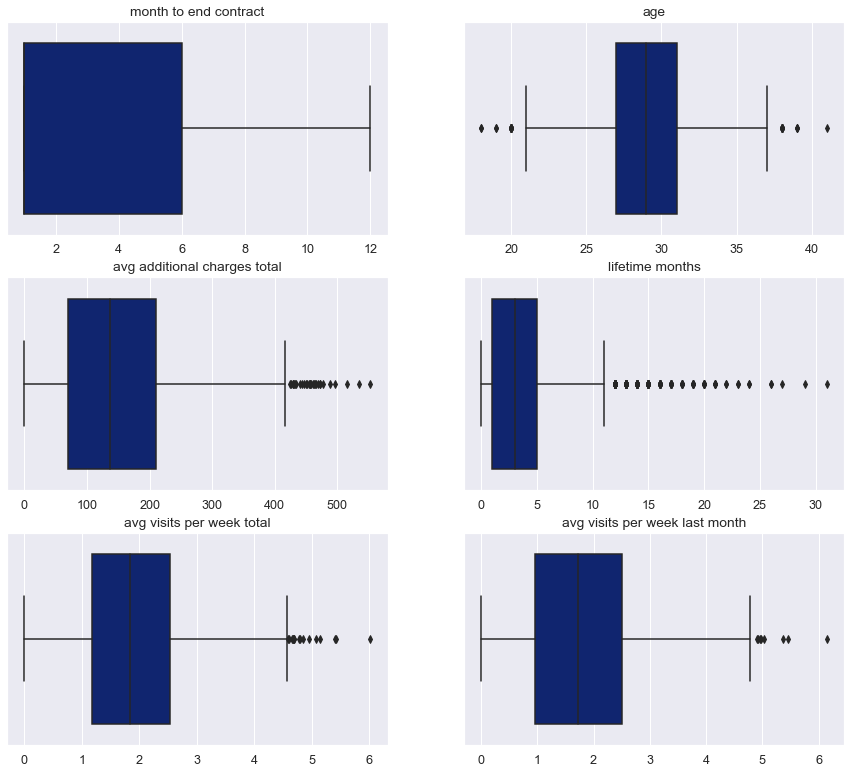

In [23]:
# Plot distributions of features for the clusters
sns.set_palette('dark')
plt.figure(figsize=(25,28))
gs = GridSpec(4, 2)

categorial = ['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_sessions',
           'contract_period_months']
numeric = ['month_to_end_contract', 'age', 'avg_additional_charges_total',
           'lifetime_months', 'avg_visits_per_week_total', 'avg_visits_per_week_last_month']

 
for i, var in enumerate(categorial):
    plt.subplot(gs[i//2, i%2], title=var.replace('_',' '))
    g=sns.countplot(data=data, x=var, hue="cluster")
    plt.xlabel('')
    plt.ylabel('')
    #plt.gca().get_legend().remove()
    #legend = data['cluster'].unique()
    plt.legend(bbox_to_anchor=(1, 1))


plt.show()

sns.set_palette('dark')
plt.figure(figsize=(15,18))
gs = GridSpec(4, 2)

for i, var in enumerate(numeric):
    plt.subplot(gs[i//2, i%2], title=var.replace('_',' '))
    sns.kdeplot(data=data, x=var, hue="cluster", fill=True, common_norm=False, palette="dark", shade=True,
    linewidth=3)
    plt.xlabel('')
    plt.ylabel('')
    #plt.gca().get_legend().remove()
    #legend = data['cluster'].unique()
    #plt.legend(legend, shadow=True, fancybox=True, loc='best')
plt.show()

## boxplot
sns.set_palette('dark')
plt.figure(figsize=(15,18))
gs = GridSpec(4, 2)
for i, var in enumerate(numeric):
    plt.subplot(gs[i//2, i%2], title=var.replace('_',' '))
    sns.boxplot(data=data, x=var, hue="cluster", palette="dark")
    plt.xlabel('')
    plt.ylabel('')
    #plt.gca().get_legend().remove()
    #legend = data['cluster'].unique()
    #plt.legend(legend, shadow=True, fancybox=True, loc='best')
plt.show()



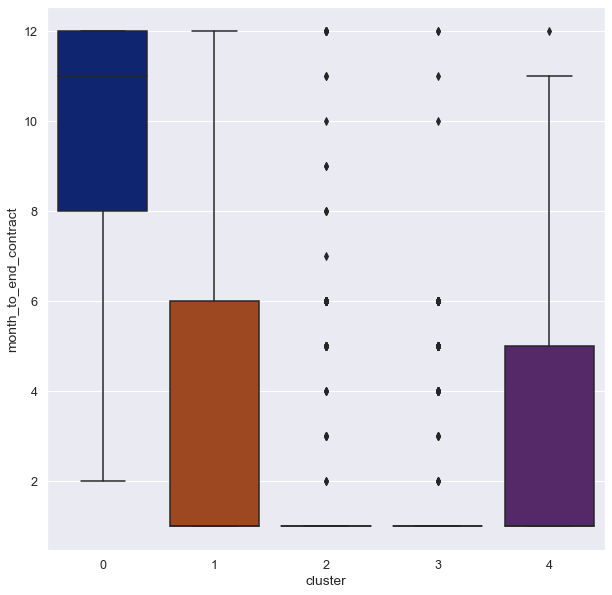

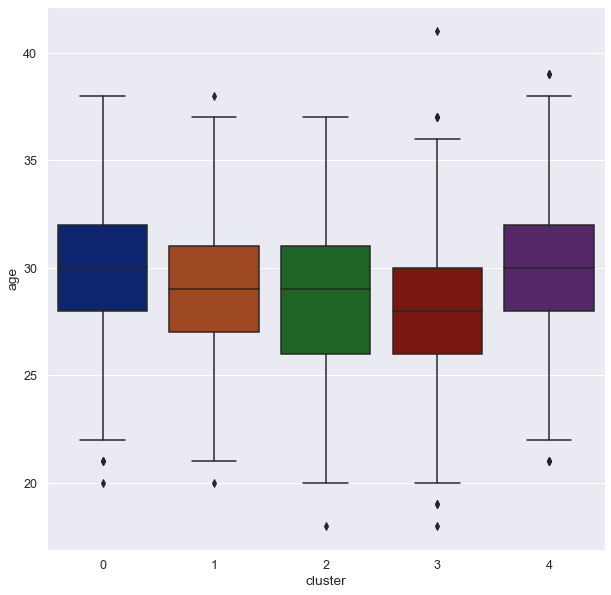

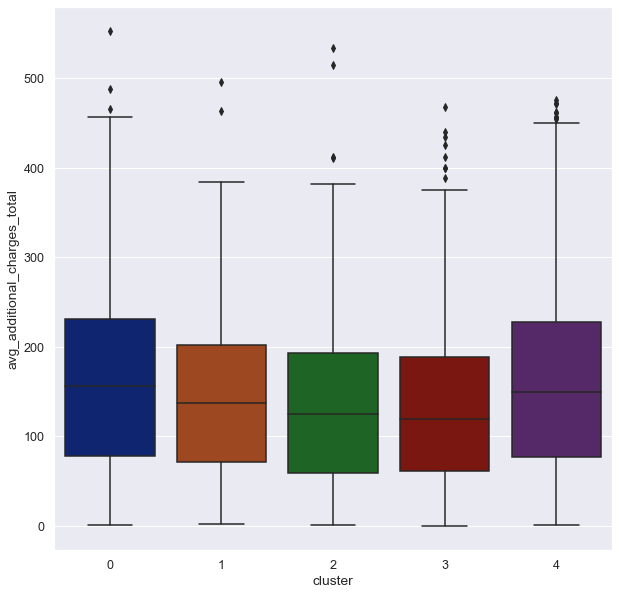

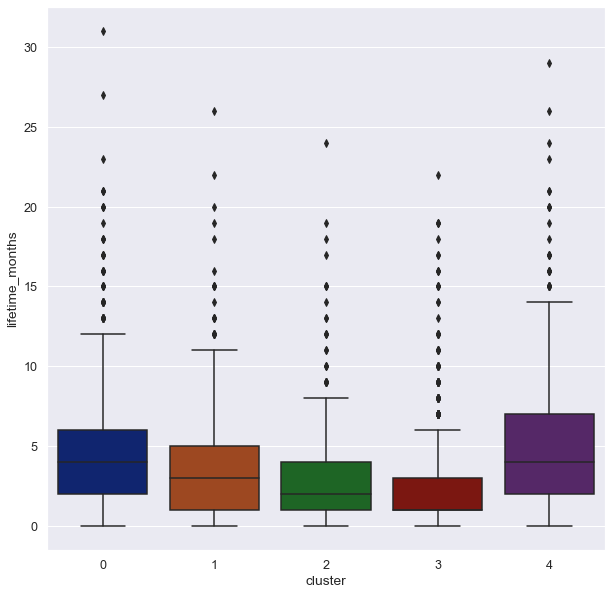

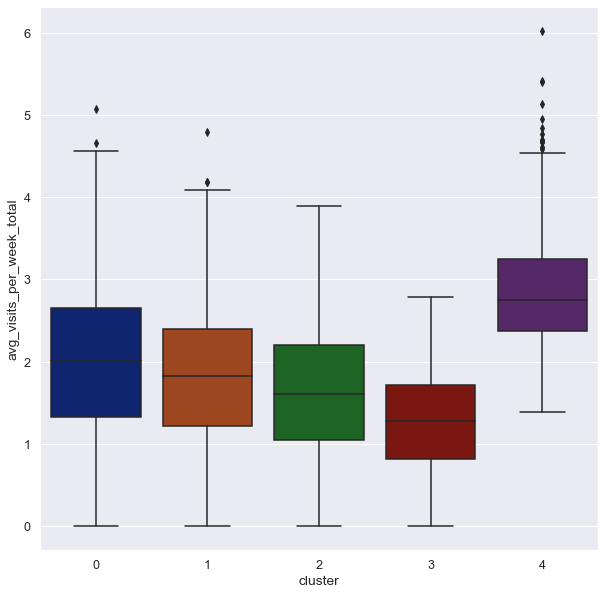

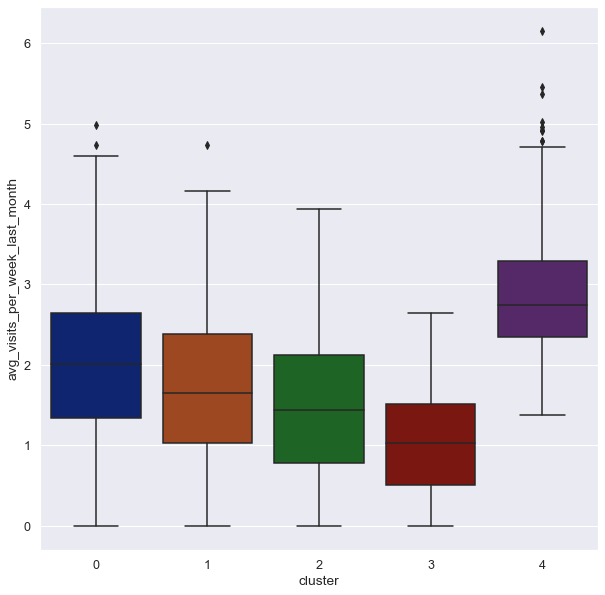

In [24]:
for feature in numeric:
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(data=data, x='cluster', y=feature)
    plt.show()

For gender, there is an equal amount distribution of males and females in each cluster.

For near_location, in cluster 2 most customers do not live near a location of a gym.

For partner, in cluster 0 most of the customers are empoyees of a partner company, while in clusters 3 & 4 most of the customers are not employees of a partner company.

For promo_friend, most of the customers in clusters 3 & 4 did not receive a promotional code from their friend.

For phone, cluster 1 include custoemrs with no phones on file.

For group_sessions, customers in cluster 3 attended less to group sessions.

For age, cluster 1 has the youngest population.

For adduitional_charges_total: customers in clusters 0 & 4 spent more. customers in clusters 1 spent less.

For lifetime_months, cluster 1 had the shorter lifetime (most customers had less than 6 months). 

For avg_visits_per_week (total & month), cluster 1 visited the gym the least amount of times (less than 2 times a week). Cluster 4 visted the most times a week (more than 2 times a week).

For contract_period_months, cluster 0 has the longest contract- 12 month contract and clsuter 3 & 4 was the customers with a one month contract.

For month_to_end_contract, cluster 1 & 2 & 4has 1 month remaining, while cluster 0 has 12 months remaining.

In [25]:
# Calculate the churn rate for each cluster (use the groupby() method). 
curn_rate = data.groupby(['cluster'])['churn'].mean().reset_index() 
curn_rate['churn'] = curn_rate['churn'] *100
curn_rate.columns=['cluster' , 'churn rate']
curn_rate

,cluster,churn rate
0,0,2.772277
1,1,26.753247
2,2,44.356436
3,3,51.426307
4,4,6.801909


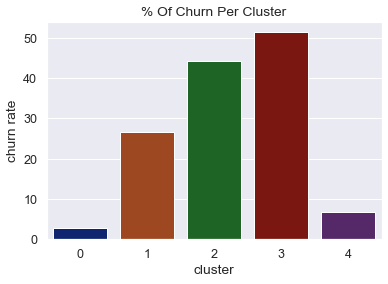

In [26]:
sns.barplot(x='cluster',y='churn rate',data=curn_rate)
plt.title('% Of Churn Per Cluster')
plt.show()

Clusters 2 and 3 has the highest churn rate therfore it is the most prone to leaving. 
Clusters 0 and 4 have the lowest churn rate therfore they are more loyal customers. 

## Step 5. Conclusions and  recommendations 

Recommendations regarding the strategy for customer interaction and retention:

For acquiring new customers it is recomended to focus on 30 years old customrs who live or work near a gym and that are employees of a partner company.

When a new customer sign a contract it is recommended to encourage him to provide his phone numbr in order to have an open communication channel with him. This can be done by a prize-winning lotteries for examples  or offering gifts for customers who will provide there phone. 
In adittion it is recommended to encourage him to sign for a long contract in ordere to increase the chances that he will stay. 
During customer lifetime the gym can send emails or do phone calls to make sure the customers are aware of all the services it offer  and the gym can also encourage weekly visits by having a special daies where there are discounted prices on additional services such as food, spa, etc.


For existing customers, it is recommended  to contact them more than a month before their contract ends and espeacilly focus on the younger customers that visit the gym less than twice a week. It is recommended to make sure they are satisfied and if not to offer some benfits that maight convonce them to stay.

